In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import streamlit as st

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"D:\Data Science\Project\AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
# convert date column into datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# set date column as index
data.set_index('Date',inplace=True)

In [6]:
# drop columns irrelevant
data.drop(['Adj Close','Volume'],inplace=True,axis=1)
data.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143
2012-01-04,58.571430,59.240002,58.468571,59.062859
2012-01-05,59.278572,59.792858,58.952858,59.718571
2012-01-06,59.967144,60.392857,59.888573,60.342857
2012-01-09,60.785713,61.107143,60.192856,60.247143


In [7]:
data_close = pd.DataFrame(data['Close'],columns=['Close'])
data_close

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


### SARIMA

In [8]:
model_sarima_final = sm.tsa.SARIMAX(data_close.Close,order=(0,1,2),seasonal_order=(1,1,0,66))
sarima_fit_final = model_sarima_final.fit()

In [9]:
# Forecasting for next 30 days
forecast = sarima_fit_final.predict(len(data_close),len(data_close)+29)
forecast_df = pd.DataFrame(forecast)
# forecast_df.columns = ['Close']
forecast_df

,predicted_mean
2011,290.909872
2012,288.783406
2013,293.458030
2014,293.726668
2015,290.065324
2016,292.839898
2017,296.441186
2018,297.333424
2019,295.954851
2020,295.050582


In [10]:
# Set appropriate date as index for plotting forecast data
datetime = pd.date_range('2020-01-01', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['Date'])

data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

,predicted_mean
Date,
2020-01-01,290.909872
2020-01-02,288.783406
2020-01-03,293.458030
2020-01-06,293.726668
2020-01-07,290.065324
2020-01-08,292.839898
2020-01-09,296.441186
2020-01-10,297.333424
2020-01-13,295.954851


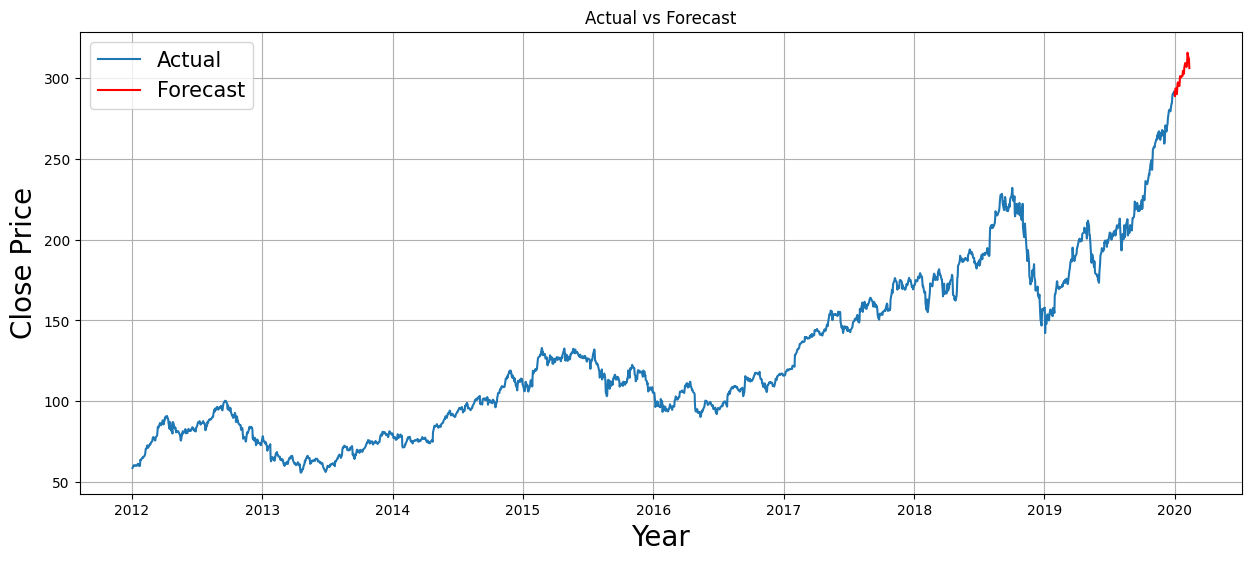

In [11]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast');plt.xlabel('Year', fontsize=20);plt.ylabel('Stock Price', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.grid(True)
plt.show()

## Deployment

In [12]:
!pip install dump
from pickle import dump

In [13]:
#dump(sarima_fit_final,open('sarima_fit_final.sav','wb'))

In [14]:
dump(data_close,open('data_close.sav','wb'))
dump(datetime,open('datetime.sav','wb'))

In [15]:
st.pyplot()

2022-12-06 15:25:50.310 
  command:

    streamlit run C:\Users\ADMIN\anaconda3\envs\Envorinment_Name\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)